In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('./dataset.csv')
display(df.head())

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


In [ ]:
df['tweet'].duplicated().sum()

0

In [ ]:
df['tweet'].isnull().sum()

0

In [ ]:
pattern_username = r'@(\w+)'
df['tokoh'] = df['tweet'].str.findall(pattern_username).apply(lambda x: ', '.join(x))
pattern_hashtag = r'#(\w+)'
df['hashtag'] = df['tweet'].str.findall(pattern_hashtag).apply(lambda x: ', '.join(x))

In [ ]:
def data_cleaner(tweet):
  tweet = tweet.str.replace('https\S+',' ', case=False)
  tweet = tweet.str.replace('<.*?/>',' ', case=False)
  tweet = tweet.str.replace('\d+',' ', case=False)
  tweet = tweet.str.replace('[^A-Za-z0-9 ]+',' ', case=False)

  return tweet

In [ ]:
df['tweet'] = data_cleaner(df['tweet'])

<ipython-input-9-3d4a450a248c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('https\S+',' ', case=False)
<ipython-input-9-3d4a450a248c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('<.*?/>',' ', case=False)
<ipython-input-9-3d4a450a248c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('\d+',' ', case=False)
<ipython-input-9-3d4a450a248c>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace('[^A-Za-z0-9 ]+',' ', case=False)


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))-{'tidak','bukan'}

def remove_stopwords(text):
    words = str(text).lower()
    cleaned_words = [word for word in words.split(' ') if word not in stop_words and len(word) > 3]
    return ' '.join(cleaned_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = df['tweet']

In [ ]:
# cleaned_stopwords = []

# for idx in range(len(data)):
#   cleaned = remove_stopwords(data[idx])
#   cleaned_stopwords.append(cleaned)

df['cleaned_stopwords'] = df['tweet'].apply(lambda x:remove_stopwords(x))

# df.assign(Cleaned=cleaned_stopwords)
# df['cleaned_stopwords'] = cleaned_stopwords
df

,Unnamed: 0,sentimen,tweet,tokoh,hashtag,cleaned_stopwords,tokenized
0,0,-1,Kata prabowo Indonesia tidak dihargai bangsa ...,"prabowo, rockygerung",,prabowo indonesia tidak dihargai bangsa asing ...,"[kata, prabowo, indonesia, tidak, dihargai, ba..."
1,1,0,Batuan Langka Tasbih Jokowi Hadiah dari Habib...,,,batuan langka tasbih jokowi hadiah habib luthf...,"[batuan, langka, tasbih, jokowi, hadiah, dari,..."
2,2,0,Di era Jokowi ekonomi Indonesia semakin baik ...,,"01IndonesiaMaju, JokowiLagi, JokowiMenangTotal...",jokowi ekonomi indonesia indonesiamaju jokowil...,"[di, era, jokowi, ekonomi, indonesia, semakin,..."
3,3,1,Bagi Sumatera Selatan Asian Games berdampak p...,,,sumatera selatan asian games berdampak ekonomi...,"[bagi, sumatera, selatan, asian, games, berdam..."
4,4,-1,Negara kita ngutang buat bngun infrastruktur y...,,,negara ngutang bngun infrastruktur udah dipake...,"[negara, kita, ngutang, buat, bngun, infrastru..."
...,...,...,...,...,...,...,...
1810,1810,0,Negarawan sejati sll bangga dan mengedepankan ...,,2019GantiPresiden,negarawan sejati bangga mengedepankan harga ba...,"[negarawan, sejati, sll, bangga, dan, mengedep..."
1811,1811,0,HRS ceramah di Damai Indonesiaku Perekon...,,PutihkanGBK,ceramah damai indonesiaku perekonomian membaik...,"[, hrs, ceramah, di, damai, indonesiaku, perek..."
1812,1812,0,Mari bangun bangsa dgn mendukung perekonomian ...,,,mari bangun bangsa mendukung perekonomian nega...,"[mari, bangun, bangsa, dgn, mendukung, perekon..."
1813,1813,0,Bantu majukan perekonomian bangsa bersama Pak ...,,,bantu majukan perekonomian bangsa jokowi,"[bantu, majukan, perekonomian, bangsa, bersama..."


In [ ]:
df.shape

(1815, 7)

In [ ]:
df

,Unnamed: 0,sentimen,tweet,tokoh,hashtag,cleaned_stopwords,tokenized
0,0,-1,Kata prabowo Indonesia tidak dihargai bangsa ...,"prabowo, rockygerung",,prabowo indonesia tidak dihargai bangsa asing ...,"[kata, prabowo, indonesia, tidak, dihargai, ba..."
1,1,0,Batuan Langka Tasbih Jokowi Hadiah dari Habib...,,,batuan langka tasbih jokowi hadiah habib luthf...,"[batuan, langka, tasbih, jokowi, hadiah, dari,..."
2,2,0,Di era Jokowi ekonomi Indonesia semakin baik ...,,"01IndonesiaMaju, JokowiLagi, JokowiMenangTotal...",jokowi ekonomi indonesia indonesiamaju jokowil...,"[di, era, jokowi, ekonomi, indonesia, semakin,..."
3,3,1,Bagi Sumatera Selatan Asian Games berdampak p...,,,sumatera selatan asian games berdampak ekonomi...,"[bagi, sumatera, selatan, asian, games, berdam..."
4,4,-1,Negara kita ngutang buat bngun infrastruktur y...,,,negara ngutang bngun infrastruktur udah dipake...,"[negara, kita, ngutang, buat, bngun, infrastru..."
...,...,...,...,...,...,...,...
1810,1810,0,Negarawan sejati sll bangga dan mengedepankan ...,,2019GantiPresiden,negarawan sejati bangga mengedepankan harga ba...,"[negarawan, sejati, sll, bangga, dan, mengedep..."
1811,1811,0,HRS ceramah di Damai Indonesiaku Perekon...,,PutihkanGBK,ceramah damai indonesiaku perekonomian membaik...,"[, hrs, ceramah, di, damai, indonesiaku, perek..."
1812,1812,0,Mari bangun bangsa dgn mendukung perekonomian ...,,,mari bangun bangsa mendukung perekonomian nega...,"[mari, bangun, bangsa, dgn, mendukung, perekon..."
1813,1813,0,Bantu majukan perekonomian bangsa bersama Pak ...,,,bantu majukan perekonomian bangsa jokowi,"[bantu, majukan, perekonomian, bangsa, bersama..."


(-0.5, 399.5, 199.5, -0.5)

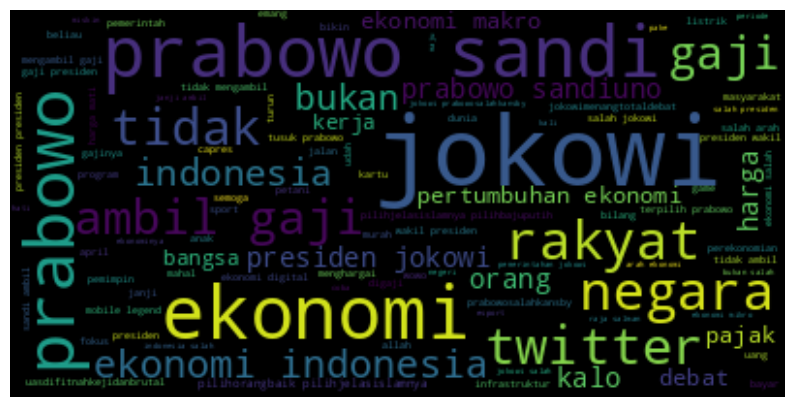

In [ ]:

tweet_All = " ".join(review for review in df['cleaned_stopwords'])


fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

In [ ]:
def show_words(sentiment):
  all = ' '.join(review for review in df[df['sentimen']==sentiment]['cleaned_stopwords'])

  fig, ax = plt.subplots(1, 1, figsize  = (10,10))
  # Create and generate a word cloud image:
  wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(all)

  # Display the generated image:
  ax.imshow(wordcloud_ALL, interpolation='bilinear')

  ax.axis('off')

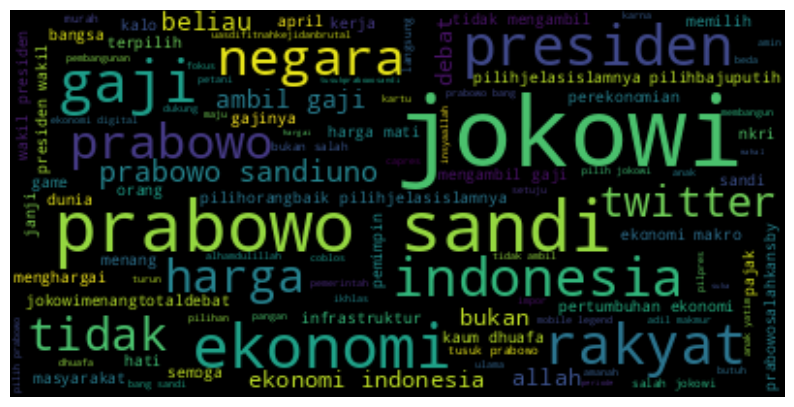

In [ ]:
show_words(1)

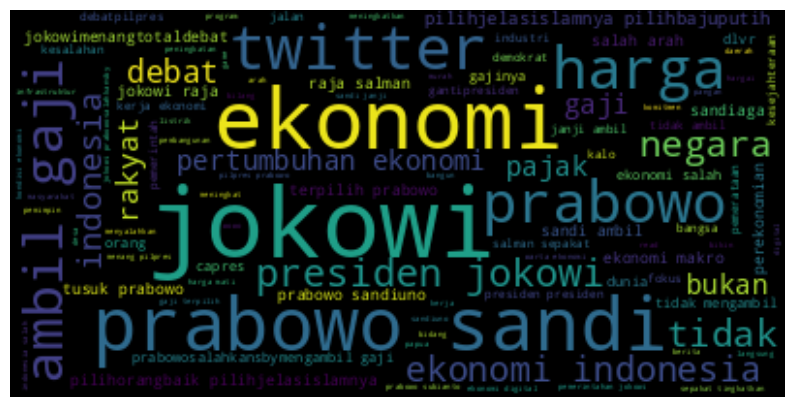

In [ ]:
show_words(0)

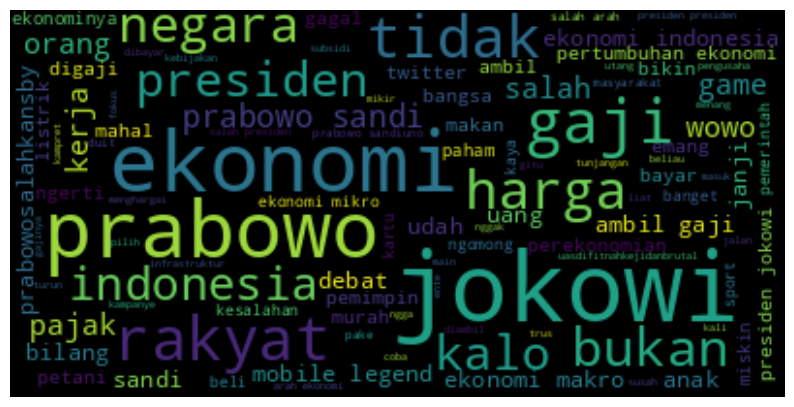

In [ ]:
show_words(-1)

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['cleaned_stopwords'].apply(lambda x: tokenization(x.lower()))
df

,Unnamed: 0,sentimen,tweet,tokoh,hashtag,cleaned_stopwords,tokenized
0,0,negatif,Kata prabowo Indonesia tidak dihargai bangsa ...,"prabowo, rockygerung",,kata prabowo indonesia tidak dihargai bangsa ...,"[kata, prabowo, indonesia, tidak, dihargai, ba..."
1,1,netral,Batuan Langka Tasbih Jokowi Hadiah dari Habib...,,,batuan langka tasbih jokowi hadiah dari habib...,"[batuan, langka, tasbih, jokowi, hadiah, dari,..."
2,2,netral,Di era Jokowi ekonomi Indonesia semakin baik ...,,"01IndonesiaMaju, JokowiLagi, JokowiMenangTotal...",di era jokowi ekonomi indonesia semakin baik ...,"[di, era, jokowi, ekonomi, indonesia, semakin,..."
3,3,positif,Bagi Sumatera Selatan Asian Games berdampak p...,,,bagi sumatera selatan asian games berdampak p...,"[bagi, sumatera, selatan, asian, games, berdam..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...,,,negara kita ngutang buat bngun infrastruktur y...,"[negara, kita, ngutang, buat, bngun, infrastru..."
...,...,...,...,...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,,2019GantiPresiden,negarawan sejati sll bangga dan mengedepankan ...,"[negarawan, sejati, sll, bangga, dan, mengedep..."
1811,1811,netral,HRS ceramah di Damai Indonesiaku Perekon...,,PutihkanGBK,hrs ceramah di damai indonesiaku perekon...,"[, hrs, ceramah, di, damai, indonesiaku, perek..."
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,,,mari bangun bangsa dgn mendukung perekonomian ...,"[mari, bangun, bangsa, dgn, mendukung, perekon..."
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,,,bantu majukan perekonomian bangsa bersama pak ...,"[bantu, majukan, perekonomian, bangsa, bersama..."


In [ ]:
df['sentimen']=np.where(df['sentimen'] == 'negatif', -1, np.where(df['sentimen'] == 'positif', 1, 0))

In [ ]:
df['sentimen'].value_counts()

 1    612
 0    607
-1    596
Name: sentimen, dtype: int64

Text(0.5, 1.0, 'Distribusi Sentimen')

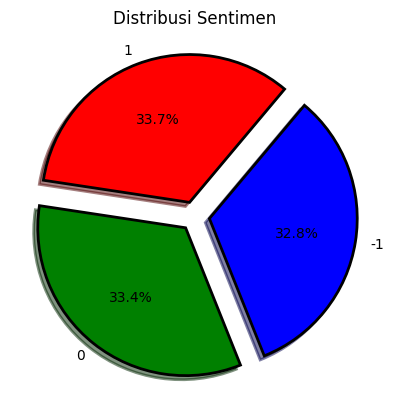

In [ ]:
# import seaborn as sns
# result = df.groupby(['sentimen']).size()
# # result = df.groupby(['sentimen']).size()
# sns.barplot(x=result.index, y=result.values)

# fig = plt.figures(figsize=(7,7))
colors = ('red','green','blue')
wp={'linewidth':2,'edgecolor':'black'}
tags = df['sentimen'].value_counts()
expld = (0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%', shadow=True, colors=colors,startangle=50, wedgeprops = wp, explode = expld, label = '')
plt.title('Distribusi Sentimen')

In [ ]:
df['tokoh']

0       prabowo, rockygerung
1                           
2                           
3                           
4                           
                ...         
1810                        
1811                        
1812                        
1813                        
1814                  jokowi
Name: tokoh, Length: 1815, dtype: object

In [ ]:
# dftokoh_unique = df['tokoh'].drop_duplicates()

# # Menggabungkan semua data pada semua baris
# merged_data = list(df['tokoh'].values..str.split(",").flatten())

# # Menghilangkan duplikat dari hasil gabungan
# unique_data = list(set(merged_data))

In [ ]:
unique_data

NameError: ignored

In [ ]:
dftokoh_unique

In [ ]:
!pip install sidetable
import sidetable as stb

In [ ]:
df[df['tweet'].str.contains('jokowi')].stb.freq(['sentimen'])


In [ ]:
df[df['tweet'].str.contains('prabowo')].stb.freq(['sentimen'])['cumulative_percent']

In [ ]:
df[df['tweet'].str.contains('jokowi')].stb.freq(['sentimen'])['cumulative_percent']

In [ ]:
X = df['tokenized']
y = df['sentimen']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
# nb = MultinomialNB()
# nb.fit(X_train, y_train)
# preds = nb.predict(X_test)